In [1]:
#Wine quality using GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


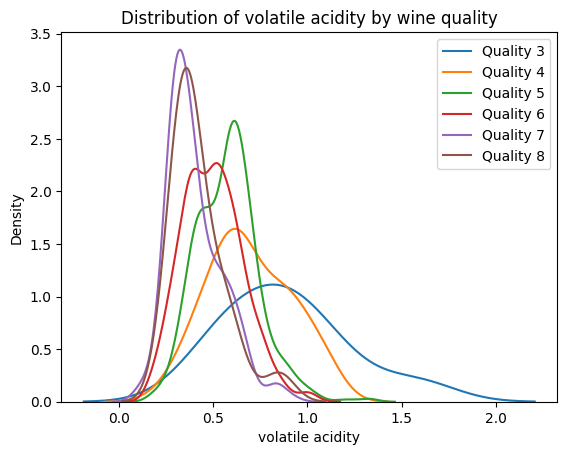

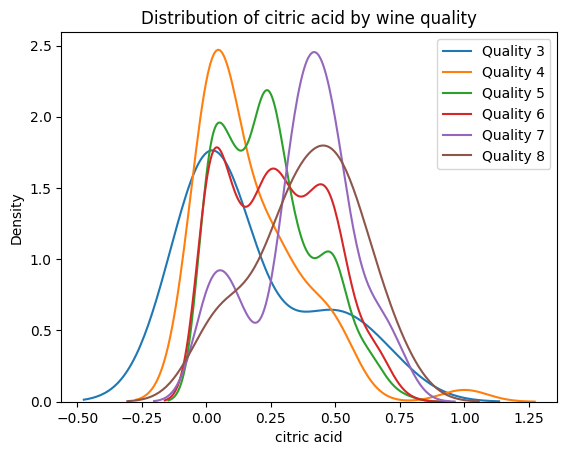

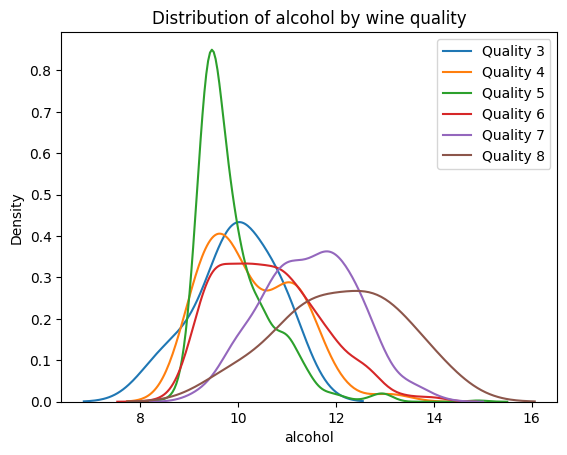

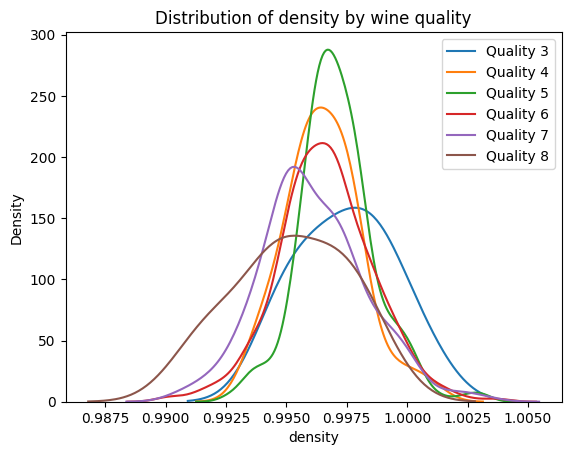

In [9]:
columns = ['volatile acidity','citric acid','alcohol','density']
for i in columns:
    for quality in sorted(df['quality'].unique()):
        sns.kdeplot(df[df['quality']==quality][i], label=f'Quality {quality}')
    plt.title(f'Distribution of {i} by wine quality')
    plt.legend()
    plt.show()

In [10]:
x = df.iloc[:, :-1]
y = df['quality']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [13]:
y_pred = gnb.predict(x_test)
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Accuracy: \n\n", accuracy_score(y_test, y_pred))
print("Confusion matrix \n\n", confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480

Accuracy: 

 0.5416666666666666
Confusion matrix 

 [[  0   0   1   0   0   0]
 [  1   2   8   6   0   0]
 [  0   6 121  63   5   0]
 [  0   9  46 107  35   3]
 [  0   0   3  28  30   0]
 [  0   0   0   1   5   0]]
